## Capstone Project - Global Terrorism Project

#### The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2016.   

#### You can access and download the raw data here:  https://www.kaggle.com/START-UMD/gtd/data

In [76]:
import pandas as pd
from datetime import datetime
from random import *
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [77]:
import plotly.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# for figures to show up in the notebook:
init_notebook_mode(connected=True) 

----
#### Get the data

In [ ]:
# Read in raw data and set as a data frame df:
df = pd.read_csv('global_terrorism_db_0617dist.csv', encoding="ISO-8859-1")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170351 entries, 0 to 170350
Columns: 135 entries, eventid to related
dtypes: float64(77), object(58)
memory usage: 175.5+ MB


In [5]:
df.head(4)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970.0,7.0,2.0,NaN,0.0,NaN,58.0,Dominican Republic,2.0,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,1.970000e+11,1970.0,0.0,0.0,NaN,0.0,NaN,130.0,Mexico,1.0,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,1.970000e+11,1970.0,1.0,0.0,NaN,0.0,NaN,160.0,Philippines,5.0,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,1.970000e+11,1970.0,1.0,0.0,NaN,0.0,NaN,78.0,Greece,8.0,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


----
#### Data Cleaning

In [6]:
# list column names:
list(df.columns)

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

In [7]:
# Subset the df with all the columns I want:
df = df[['iyear','imonth','iday', 'country','country_txt','region','region_txt','provstate','city',
          'latitude', 'longitude','success','suicide','attacktype1', 'attacktype1_txt','targtype1',
          'targtype1_txt','gname','weaptype1','weaptype1_txt','nkill','nwound']]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170351 entries, 0 to 170350
Data columns (total 22 columns):
iyear              170351 non-null float64
imonth             170350 non-null float64
iday               170350 non-null float64
country            170350 non-null float64
country_txt        170350 non-null object
region             170350 non-null float64
region_txt         170350 non-null object
provstate          155848 non-null object
city               169904 non-null object
latitude           165744 non-null float64
longitude          165744 non-null float64
success            170350 non-null float64
suicide            170350 non-null float64
attacktype1        170350 non-null float64
attacktype1_txt    170350 non-null object
targtype1          170350 non-null float64
targtype1_txt      170350 non-null object
gname              170350 non-null object
weaptype1          170350 non-null float64
weaptype1_txt      170350 non-null object
nkill              160668 non-null fl

In [9]:
# Assert that there are no missing values for iyear column:
assert pd.notnull(df.iyear).all() 

In [10]:
# change the 'iyear' column's data type:
df['iyear'] = df['iyear'].astype(int)

In [11]:
df['iyear'].head(2)

0    1970
1    1970
Name: iyear, dtype: int64

In [12]:
# imonth and iday columns each has only one missing value. I drop them.

# Remove rows in df where all of these two columns contain missing value:
df = df.dropna(subset=['imonth', 'iday'])

In [13]:
# convert data type:
df['imonth'] = df['imonth'].astype(int)

In [14]:
# convert data type:
df['iday'] = df['iday'].astype(int)

In [15]:
# check
df.dtypes

iyear                int64
imonth               int64
iday                 int64
country            float64
country_txt         object
region             float64
region_txt          object
provstate           object
city                object
latitude           float64
longitude          float64
success            float64
suicide            float64
attacktype1        float64
attacktype1_txt     object
targtype1          float64
targtype1_txt       object
gname               object
weaptype1          float64
weaptype1_txt       object
nkill              float64
nwound             float64
dtype: object

In [16]:
# how many zeros?
df['iday'].value_counts()

15    6064
1     6020
4     5818
16    5747
10    5699
9     5693
14    5682
3     5679
13    5656
12    5642
11    5615
7     5598
2     5590
28    5567
19    5549
20    5544
27    5525
8     5501
17    5498
5     5498
18    5484
25    5480
22    5466
26    5460
23    5424
6     5422
21    5420
24    5372
29    5152
30    4706
31    2888
0      891
Name: iday, dtype: int64

In [17]:
# how many zeros?
df['imonth'].value_counts()

5     15771
7     15247
8     14802
10    14728
3     14284
6     14258
4     14213
11    14064
1     14036
9     13246
2     12975
12    12706
0        20
Name: imonth, dtype: int64

In [18]:
# replace zeros with a random number from 1 to 12:
df['imonth'].replace(to_replace=0, value=randint(1, 12), inplace=True)

In [19]:
# check
df['imonth'].value_counts()

5     15771
7     15247
8     14802
10    14748
3     14284
6     14258
4     14213
11    14064
1     14036
9     13246
2     12975
12    12706
Name: imonth, dtype: int64

In [20]:
# replace zeros with a random number from 1 to 28:
df['iday'].replace(to_replace=0, value=randint(1, 28), inplace=True)

In [21]:
# check
df['iday'].value_counts()

11    6506
15    6064
1     6020
4     5818
16    5747
10    5699
9     5693
14    5682
3     5679
13    5656
12    5642
7     5598
2     5590
28    5567
19    5549
20    5544
27    5525
8     5501
5     5498
17    5498
18    5484
25    5480
22    5466
26    5460
23    5424
6     5422
21    5420
24    5372
29    5152
30    4706
31    2888
Name: iday, dtype: int64

In [22]:
# Combine the first three columns as dateTime object
df['date']=df.apply(lambda x:datetime.strptime("{0} {1} {2}".format(x['iyear'],x['imonth'], x['iday']),"%Y %m %d"),axis=1)


In [23]:
# Set the date column as the df index:
df.index = df['date']

In [24]:
# check that index is indeed Datetime now.
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 170350 entries, 1970-07-02 to 2016-12-30
Data columns (total 23 columns):
iyear              170350 non-null int64
imonth             170350 non-null int64
iday               170350 non-null int64
country            170350 non-null float64
country_txt        170350 non-null object
region             170350 non-null float64
region_txt         170350 non-null object
provstate          155848 non-null object
city               169904 non-null object
latitude           165744 non-null float64
longitude          165744 non-null float64
success            170350 non-null float64
suicide            170350 non-null float64
attacktype1        170350 non-null float64
attacktype1_txt    170350 non-null object
targtype1          170350 non-null float64
targtype1_txt      170350 non-null object
gname              170350 non-null object
weaptype1          170350 non-null float64
weaptype1_txt      170350 non-null object
nkill              160668 n

In [25]:
# Convert data types for some columns from float to int:
float_list = ['country','region', 'success','suicide', 'attacktype1', 'targtype1', 'weaptype1']
for column_name in float_list:
    df[column_name] = df[column_name].astype(int)

In [26]:
# Check 'success' column:
df['success'].value_counts()

1    152701
0     17649
Name: success, dtype: int64

In [27]:
# Check 'suicide' column:
df['suicide'].value_counts()

0    164580
1      5770
Name: suicide, dtype: int64

In [28]:
# Convert 'success' and 'suicide' columns to categorical data type:
df['success'] = df['success'].astype('category')
df['suicide'] = df['suicide'].astype('category')

In [29]:
# Rename some columns:
df.rename(columns={'iyear':'year', 'imonth':'month', 'iday':'day', 'country':'country_id',
                    'region':'region_id', 'attacktype1':'attacktype_id', 'attacktype1_txt':'attacktype_txt',
                    'targtype1':'targtype_id', 'targtype1_txt':'targtype_txt', 'gname':'gang_name',
                    'weaptype1':'weaptype_id', 'weaptype1_txt':'weaptype_txt', 'nkill':'n_killed', 
                    'nwound':'n_wound'}, inplace=True) 

In [30]:
# drop duplicate data:
df = df.drop_duplicates()

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 158285 entries, 1970-07-02 to 2016-12-30
Data columns (total 23 columns):
year              158285 non-null int64
month             158285 non-null int64
day               158285 non-null int64
country_id        158285 non-null int64
country_txt       158285 non-null object
region_id         158285 non-null int64
region_txt        158285 non-null object
provstate         145549 non-null object
city              157850 non-null object
latitude          154252 non-null float64
longitude         154252 non-null float64
success           158285 non-null category
suicide           158285 non-null category
attacktype_id     158285 non-null int64
attacktype_txt    158285 non-null object
targtype_id       158285 non-null int64
targtype_txt      158285 non-null object
gang_name         158285 non-null object
weaptype_id       158285 non-null int64
weaptype_txt      158285 non-null object
n_killed          149762 non-null float64
n_wound      

----
#### Another crucial step during the data cleaning process is to check for outliers. 

In [32]:
# Looking for outliers:
df[['n_killed', 'n_wound']].describe()

,n_killed,n_wound
count,149762.000000,144340.000000
mean,2.527564,3.399494
std,11.698295,35.883294
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,0.000000
75%,2.000000,2.000000
max,1500.000000,7366.000000


In [33]:
# show dataframe where more than 1,000 people killed:
df[df.n_killed>=1000]

,year,month,day,country_id,country_txt,region_id,region_txt,provstate,city,latitude,...,attacktype_id,attacktype_txt,targtype_id,targtype_txt,gang_name,weaptype_id,weaptype_txt,n_killed,n_wound,date
date,,,,,,,,,,,,,,,,,,,,,
1994-04-13,1994,4,13,168,Rwanda,11,Sub-Saharan Africa,Kigali,Gikoro,-1.932787,...,2,Armed Assault,14,Private Citizens & Property,Hutu extremists,5,Firearms,1180.0,0.0,1994-04-13
2001-09-11,2001,9,11,217,United States,1,North America,New York,New York City,40.712784,...,4,Hijacking,14,Private Citizens & Property,Al-Qaida,10,Vehicle (not to include vehicle-borne explosiv...,1383.0,7366.0,2001-09-11
2001-09-11,2001,9,11,217,United States,1,North America,New York,New York City,40.712784,...,4,Hijacking,14,Private Citizens & Property,Al-Qaida,10,Vehicle (not to include vehicle-borne explosiv...,1382.0,7365.0,2001-09-11
2014-06-12,2014,6,12,95,Iraq,10,Middle East & North Africa,Saladin,Tikrit,34.596934,...,6,Hostage Taking (Kidnapping),4,Military,Islamic State of Iraq and the Levant (ISIL),5,Firearms,1500.0,NaN,2014-06-12


In [34]:
# show dataframe where more than 7,000 people wounded:
df[df.n_wound>=7000]

,year,month,day,country_id,country_txt,region_id,region_txt,provstate,city,latitude,...,attacktype_id,attacktype_txt,targtype_id,targtype_txt,gang_name,weaptype_id,weaptype_txt,n_killed,n_wound,date
date,,,,,,,,,,,,,,,,,,,,,
2001-09-11,2001,9,11,217,United States,1,North America,New York,New York City,40.712784,...,4,Hijacking,14,Private Citizens & Property,Al-Qaida,10,Vehicle (not to include vehicle-borne explosiv...,1383.0,7366.0,2001-09-11
2001-09-11,2001,9,11,217,United States,1,North America,New York,New York City,40.712784,...,4,Hijacking,14,Private Citizens & Property,Al-Qaida,10,Vehicle (not to include vehicle-borne explosiv...,1382.0,7365.0,2001-09-11


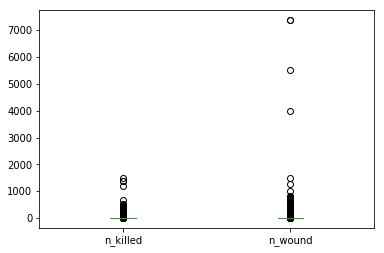

In [35]:
# visualize the outliers for the two columns:
df[['n_killed', 'n_wound']].plot.box()

----
### Exploratory Data Analysis

In [37]:
# Set Style
sns.set_style('white')  

----
#### Is there a trend in numbers of terrorist attacks over the years?

Text(0,0.5,'Count')

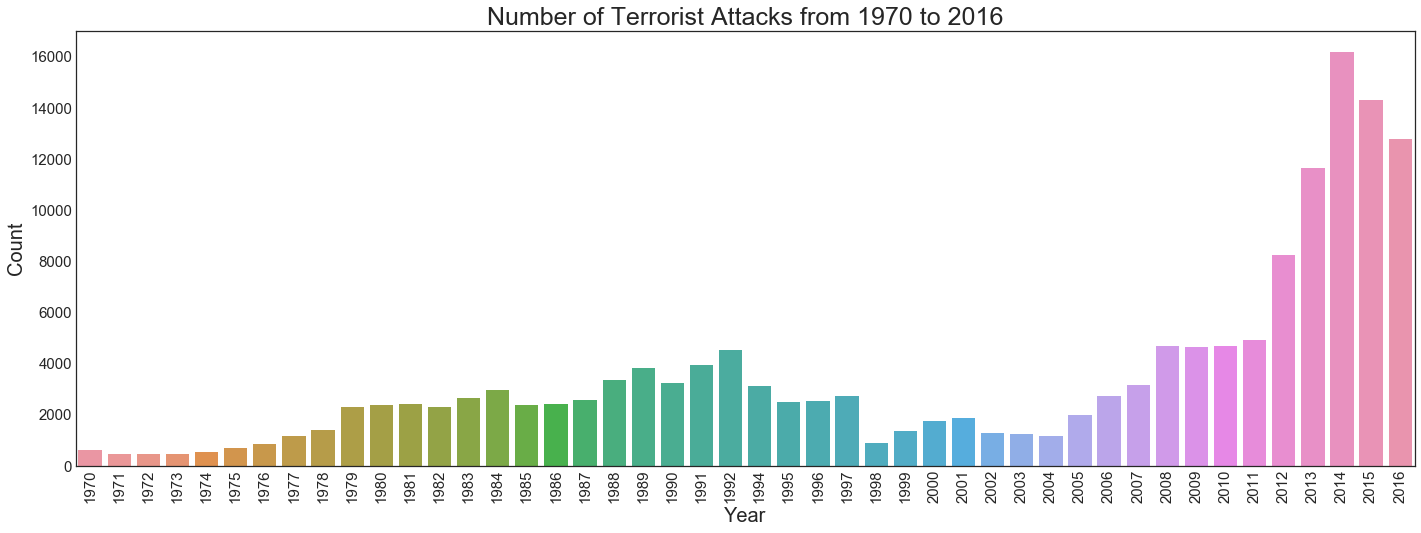

In [218]:
# Number of Terrorist Attacks from 1970 to 2016:
plt.figure(figsize=(24, 8))
sns.countplot('year', data=df)
plt.title('Number of Terrorist Attacks from 1970 to 2016', fontsize=25)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Year', fontsize=20) 
plt.ylabel('Count', fontsize=20)

#### From this graph, we can see that numbers of terrorist attacks have increased dramatically in recent years.

----
#### How about number of people killed? Is there a trend?

Text(0,0.5,'Count')

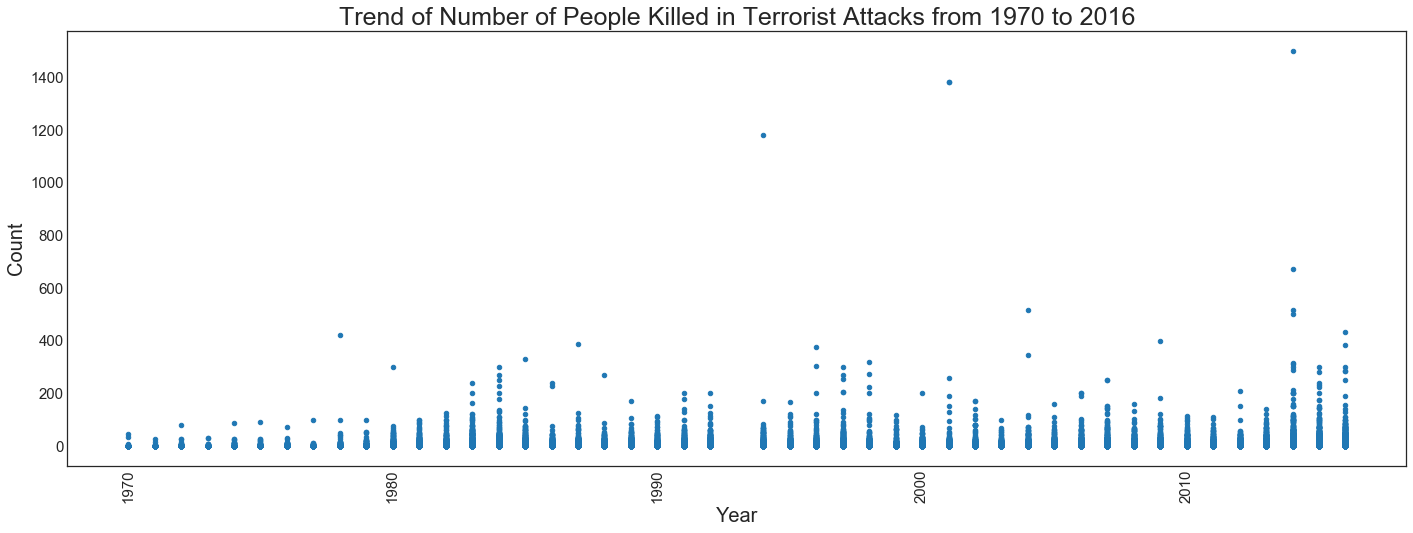

In [217]:
# Trend of Number of People Killed in Terrorist Attacks from 1970 to 2016   
df.plot.scatter(x='year', y='n_killed', figsize=(24, 8))
plt.title('Trend of Number of People Killed in Terrorist Attacks from 1970 to 2016', fontsize=25)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Year', fontsize=20) 
plt.ylabel('Count', fontsize=20)

#### There seems to be a few large-scale terrorist attacks where a lot of people died since year 1993.

----
#### How about number of people wounded? Is there a trend?

Text(0,0.5,'Count')

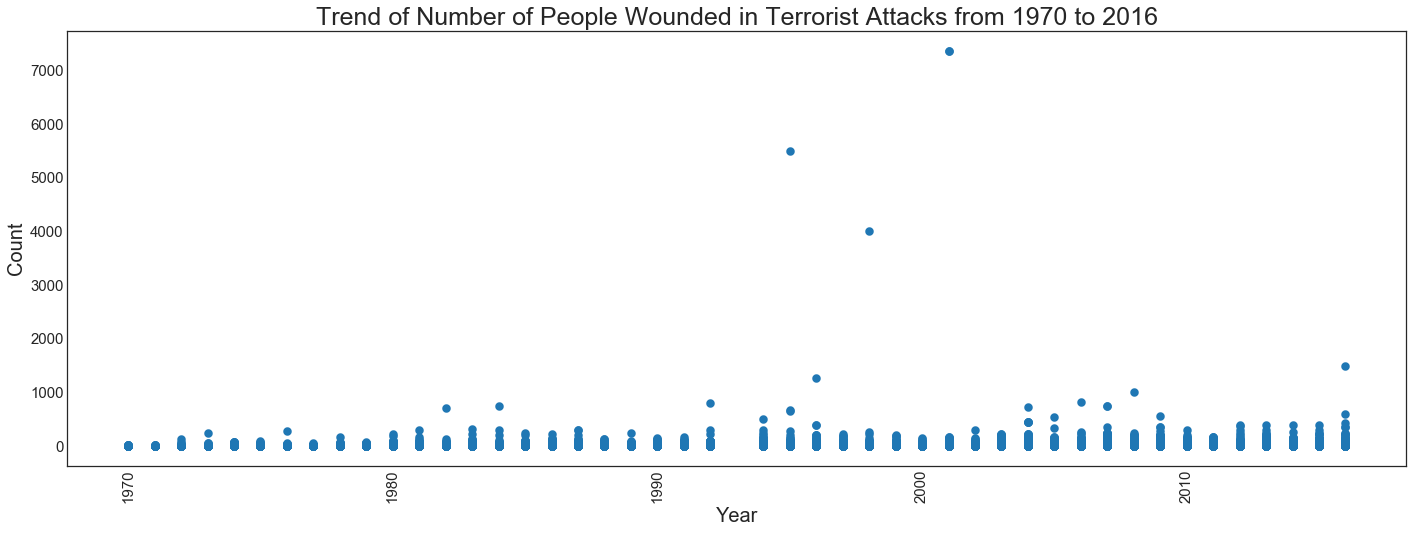

In [216]:
# Trend of Number of People Wounded in Terrorist Attacks from 1970 to 2016   
df.plot.scatter(x='year', y='n_wound', figsize=(24, 8), lw=4)
plt.title('Trend of Number of People Wounded in Terrorist Attacks from 1970 to 2016', fontsize=25)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Year', fontsize=20) 
plt.ylabel('Count', fontsize=20)

#### Again, there seems to be a few large-scale terrorist attacks where a lot of people wounded since year 1993.

----
#### Now I want to see which regions have the highest number of terrorist attacks?

Text(0,0.5,'Count')

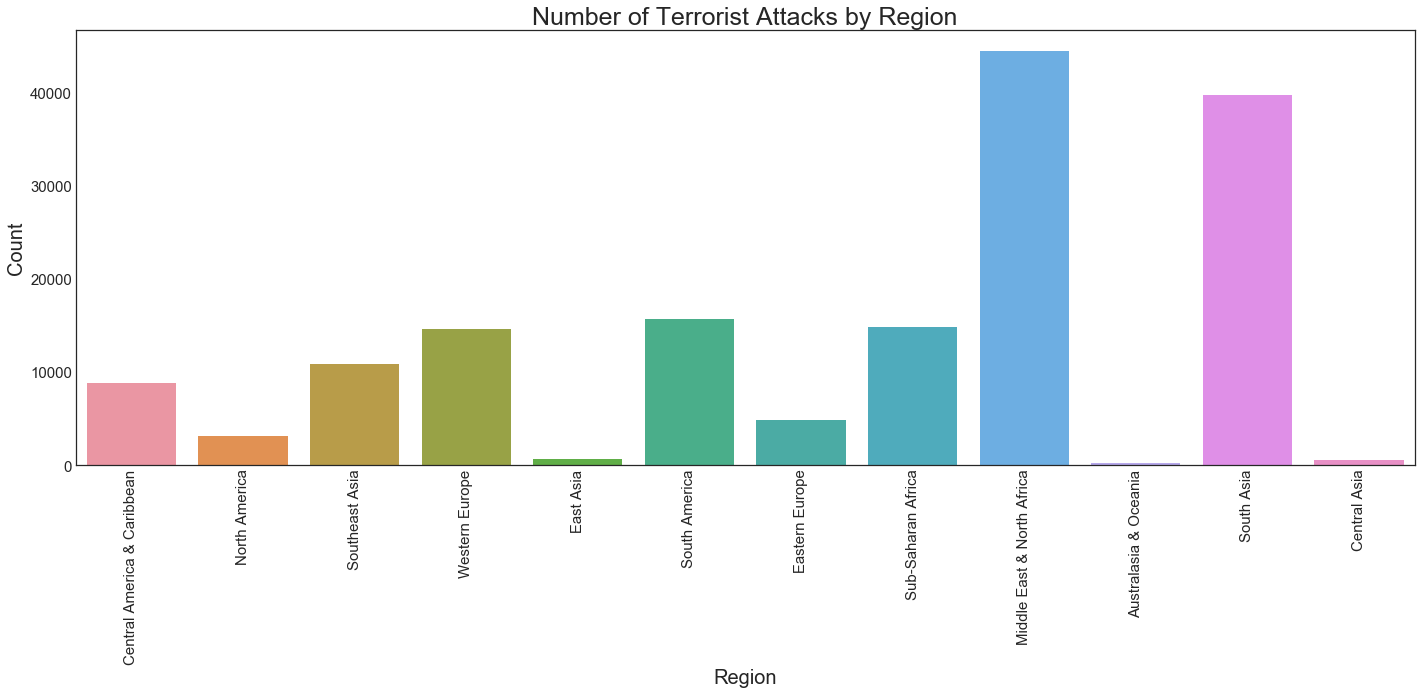

In [215]:
# Number of Terrorist Attacks by Region:
plt.figure(figsize=(24, 8))
sns.countplot('region_txt', data=df)
plt.title('Number of Terrorist Attacks by Region', fontsize=25)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Region', fontsize=20) 
plt.ylabel('Count', fontsize=20)

#### From this graph, we see that Middle East & North Africa region has the highest number of terrorist attacks, followed by the South Asia region.

----
#### How about number of attacks by attack type?

Text(0,0.5,'Count')

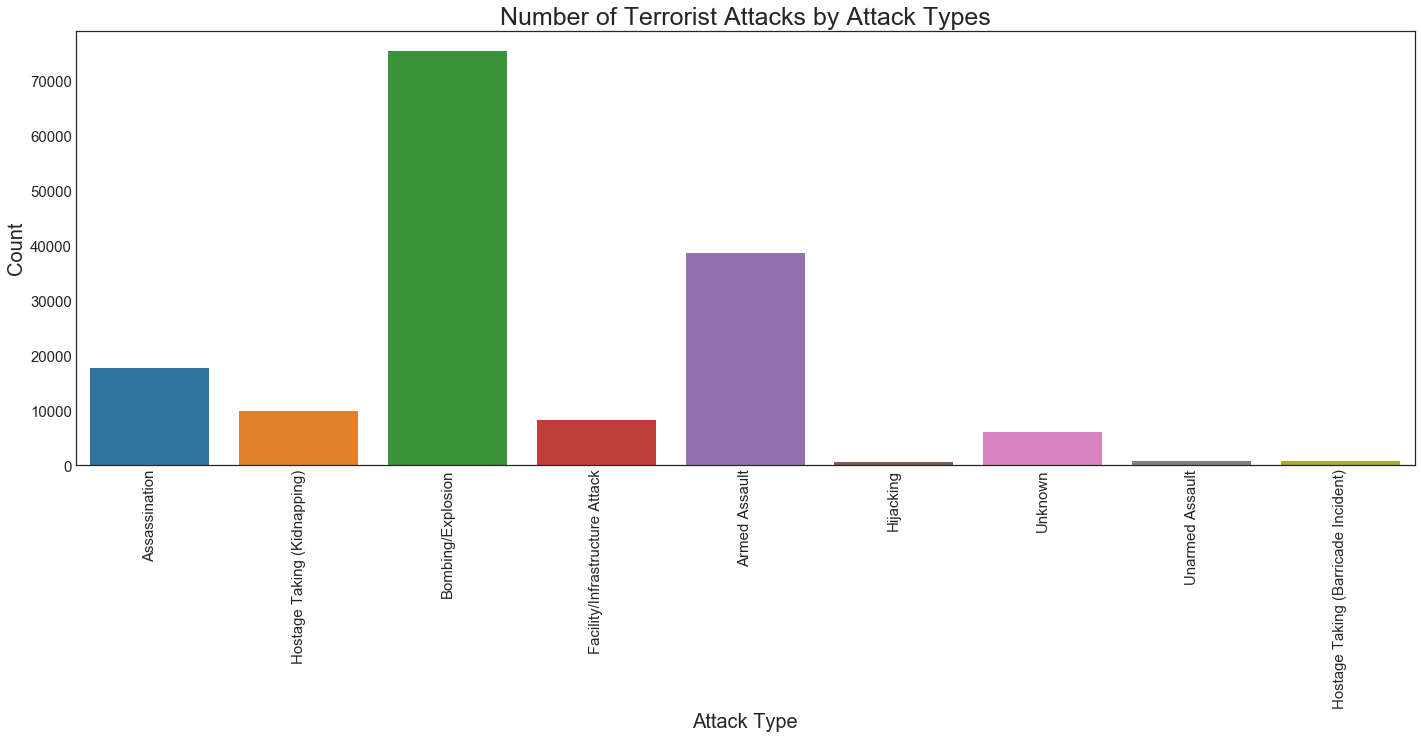

In [214]:
# Number of Terrorist Attacks by Attack Types:
plt.figure(figsize=(24, 8))
sns.countplot('attacktype_txt', data=df)
plt.title('Number of Terrorist Attacks by Attack Types', fontsize=25)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Attack Type', fontsize=20) 
plt.ylabel('Count', fontsize=20)

#### We can see that Bombing/explosion was used most frequently by terrorists by far.

----
#### Which target group is most vulnerable during terrorist attacks?

Text(0,0.5,'Count')

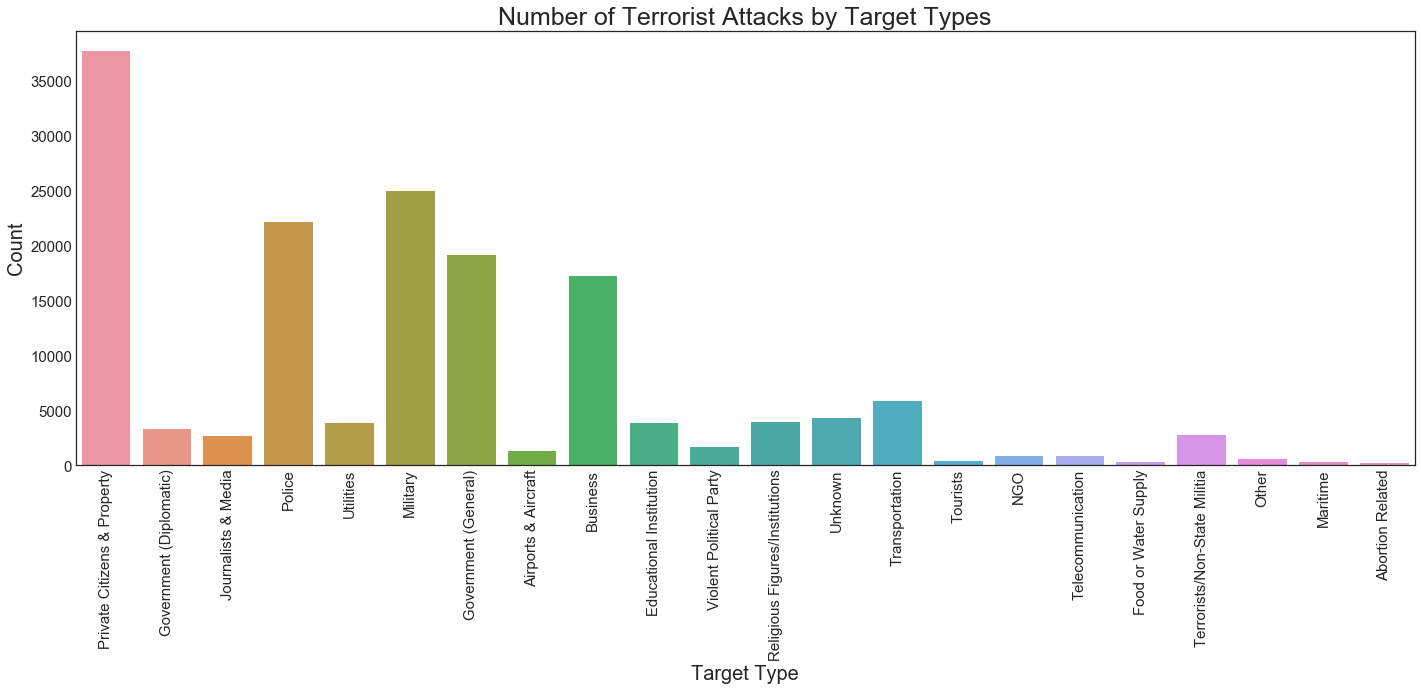

In [213]:
# Number of Terrorist Attacks by Target Types:
plt.figure(figsize=(24, 8))
sns.countplot('targtype_txt', data=df)
plt.title('Number of Terrorist Attacks by Target Types', fontsize=25)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Target Type', fontsize=20) 
plt.ylabel('Count', fontsize=20)

#### Private citizens and properties are most vulnerable.

----
#### Now, let's investigate which attack type is most lethal (kill most people).

In [44]:
df_attacktype = df.groupby('attacktype_txt')[['n_killed']].count()

In [45]:
df_attacktype.reset_index(inplace=True)

In [46]:
df_attacktype

,attacktype_txt,n_killed
0,Armed Assault,36577
1,Assassination,17715
2,Bombing/Explosion,72378
3,Facility/Infrastructure Attack,7723
4,Hijacking,546
5,Hostage Taking (Barricade Incident),746
6,Hostage Taking (Kidnapping),7806
7,Unarmed Assault,804
8,Unknown,5467


Text(0,0.5,'Count')

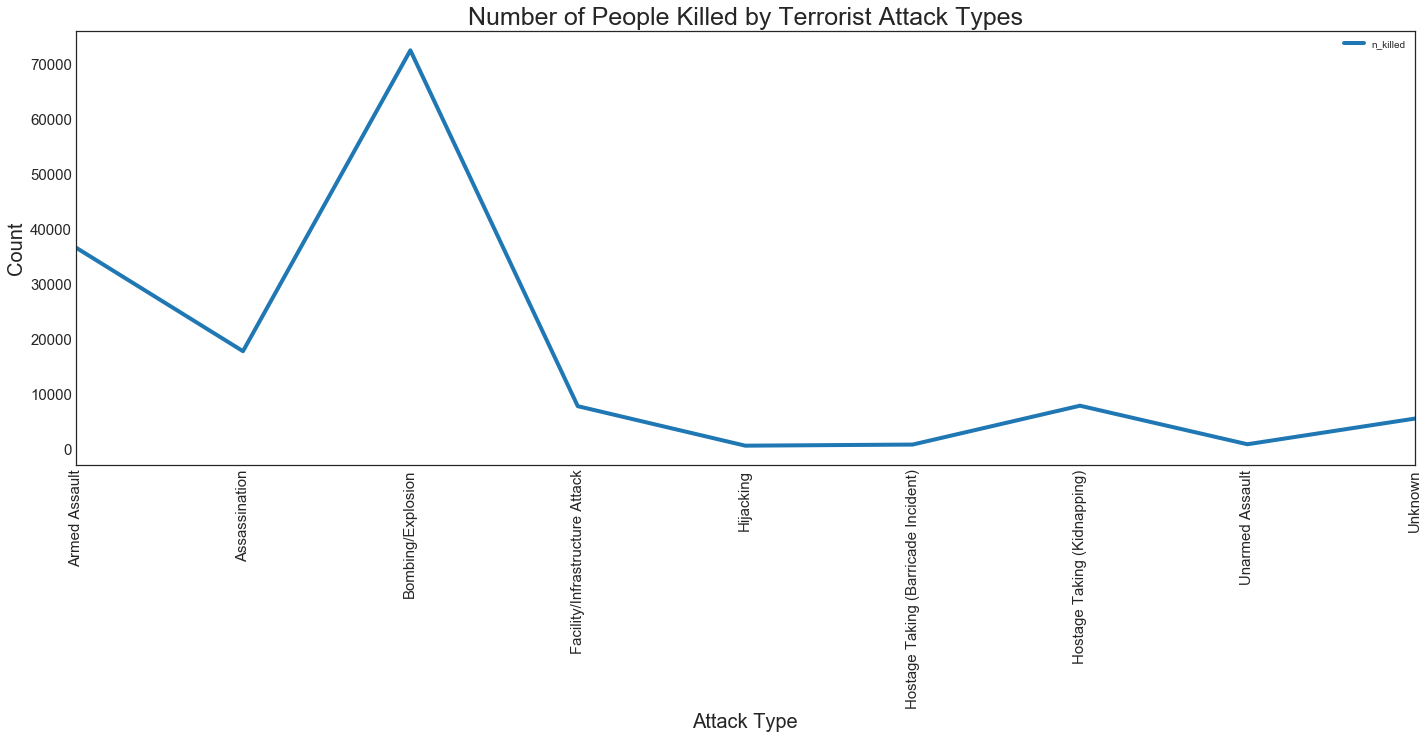

In [211]:
# Number of People Killed by Terrorist Attack Types: 
df_attacktype.plot(x='attacktype_txt', y='n_killed', figsize=(24, 8), lw=4)
plt.title('Number of People Killed by Terrorist Attack Types', fontsize=25)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Attack Type', fontsize=20)
plt.ylabel('Count', fontsize=20)

#### Bombing/explosion is most lethal.

----
#### What if I lay number of terrorist attacks and number of people killed in the same graph by attack types? Is there going to be a correlation between number of terrorist attacks and number of people killed?

Text(0,0.5,'Count')

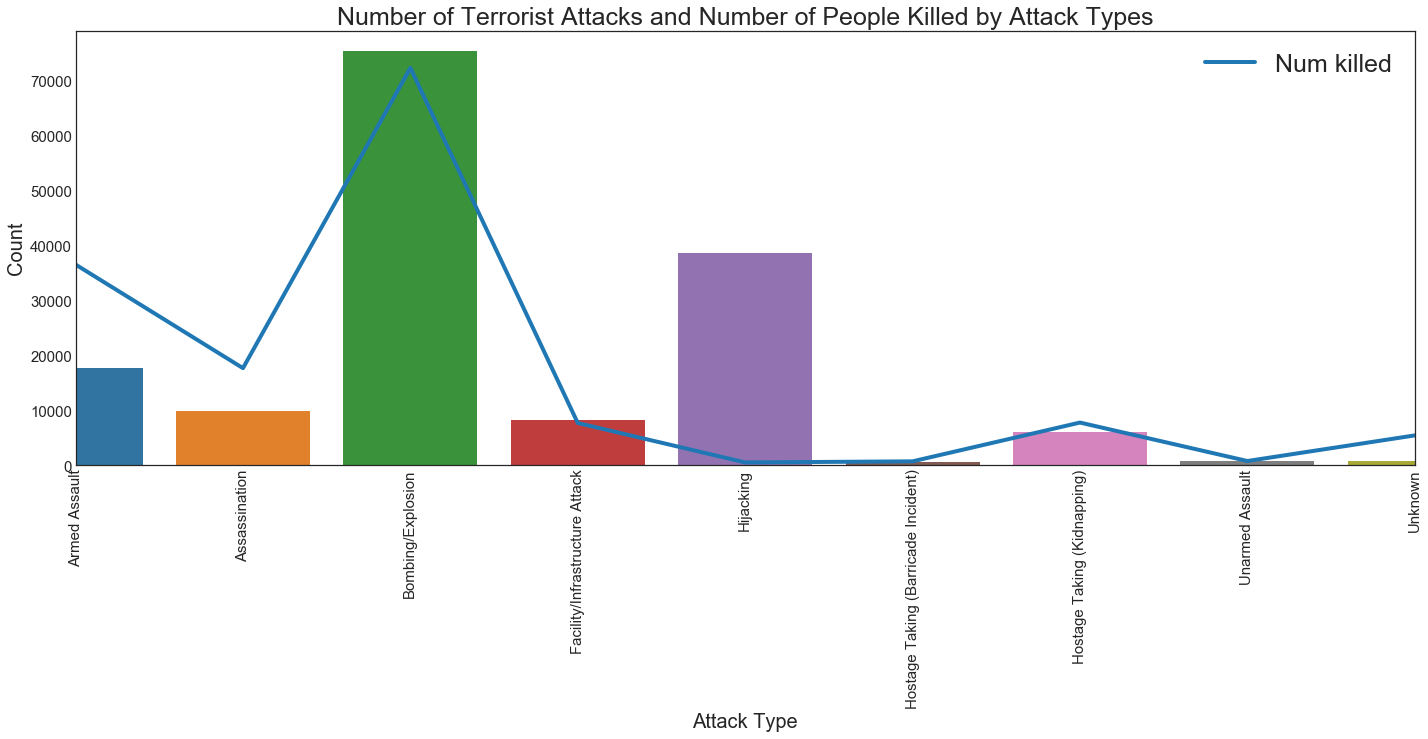

In [204]:
# Number of Terrorist Attacks and Number of People Killed by Attack Types:

# Overlay two graphs:
fig, ax = plt.subplots(figsize=(24, 8))
sns.countplot('attacktype_txt', data=df, ax=ax)
df_attacktype.plot(x='attacktype_txt', y='n_killed', figsize=(24, 8), lw=4, ax=ax)
plt.legend(['Num killed'], fontsize=25)
plt.title('Number of Terrorist Attacks and Number of People Killed by Attack Types', fontsize=25)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Attack Type', fontsize=20)
plt.ylabel('Count', fontsize=20)

#### As expected, there is a correlation between number of terrorist attacks and number of people killed for most attack types. One exception is the attack type 'hijacking': although there are many incidences of hijacking, the number of people died from these incidences was low.  

----
#### Is there a trend for different regions?

In [206]:
# Make a frequency table of year and region:
df_region = pd.crosstab(index=df.year, columns=df.region_txt)  
df_region

region_txt,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
year,,,,,,,,,,,,
1970,1,7,0,2,12,28,447,62,1,10,3,47
1971,1,5,0,1,3,55,232,22,0,6,2,124
1972,2,3,0,0,1,35,61,17,1,10,0,340
1973,1,6,0,2,1,19,62,81,1,2,4,285
1974,1,11,0,4,2,38,96,61,2,3,7,309
1975,0,9,0,9,0,40,139,51,4,7,12,421
1976,0,44,0,2,0,52,106,88,4,12,10,533
1977,0,23,0,3,2,191,130,110,2,8,29,676
1978,2,190,0,34,2,122,106,208,2,35,45,669


Text(0,0.5,'Count')

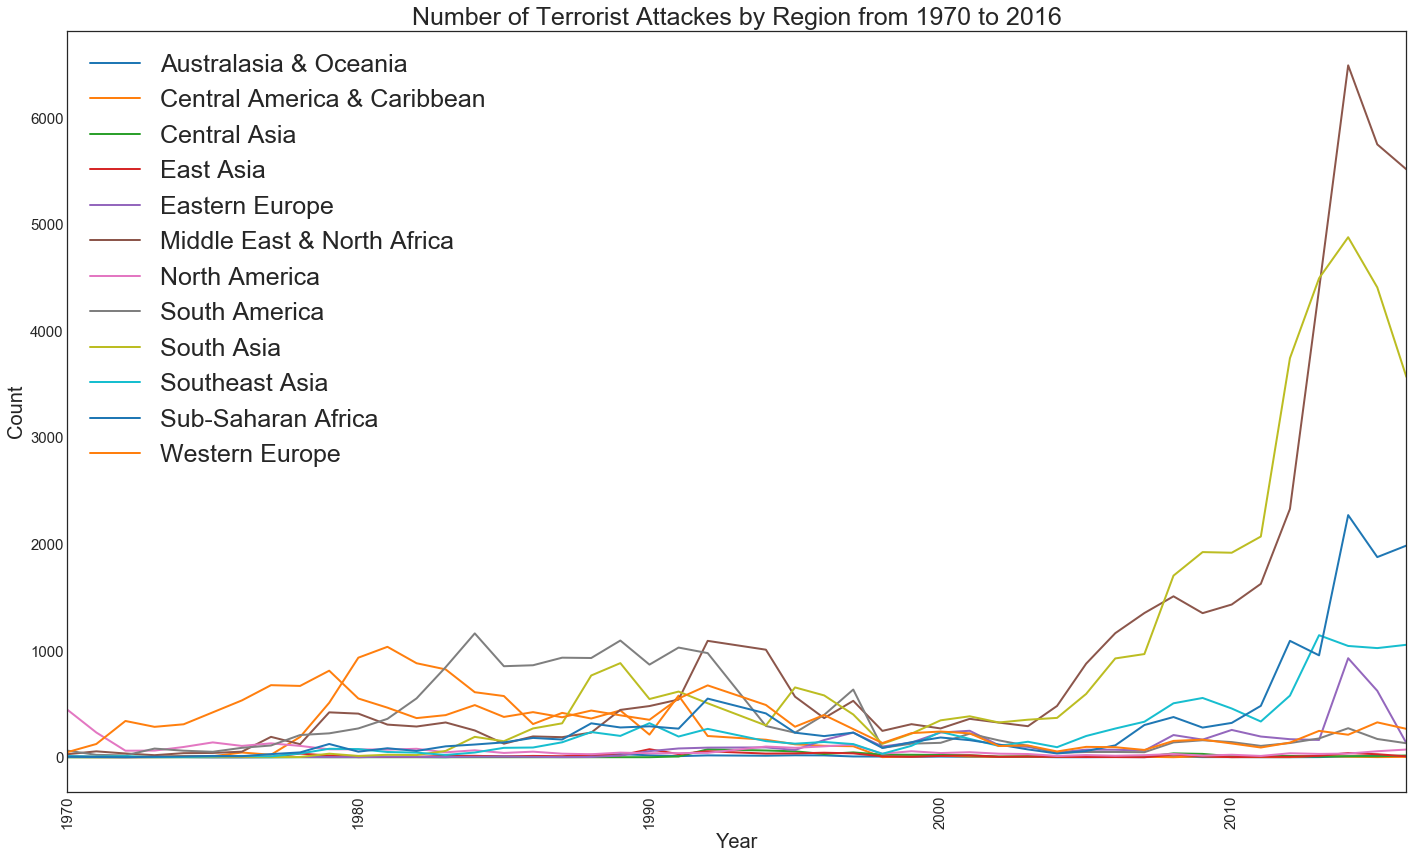

In [208]:
# Number of Terrorist Attackes by Region from 1970 to 2016:
df_region.plot(figsize=(24, 14), lw=2)
plt.legend(fontsize=25)
plt.title('Number of Terrorist Attackes by Region from 1970 to 2016', fontsize=25)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Count', fontsize=20)

#### We can see that Middle East & North Africa region has experienced a sharp increase in terrorist activities since year 2010.

----

#### Is there a difference among attack types in different regions?

In [52]:
# Make a frequency table of region and attack types:
df_region_attack = pd.crosstab(index=df.region_txt, columns=df.attacktype_txt)  
df_region_attack

attacktype_txt,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
region_txt,,,,,,,,,
Australasia & Oceania,49,30,73,66,3,5,11,8,14
Central America & Caribbean,4171,1189,2128,328,26,137,483,16,294
Central Asia,114,114,218,18,8,2,45,4,16
East Asia,100,54,254,170,18,3,14,35,23
Eastern Europe,1193,385,2625,227,26,20,216,56,109
Middle East & North Africa,8565,4004,26755,873,126,86,2354,164,1509
North America,381,236,1389,823,18,63,112,69,30
South America,3480,2538,6698,649,63,206,1320,36,681
South Asia,10145,3757,19189,1618,82,100,2935,213,1635


Text(0.5,55.5,'Region')

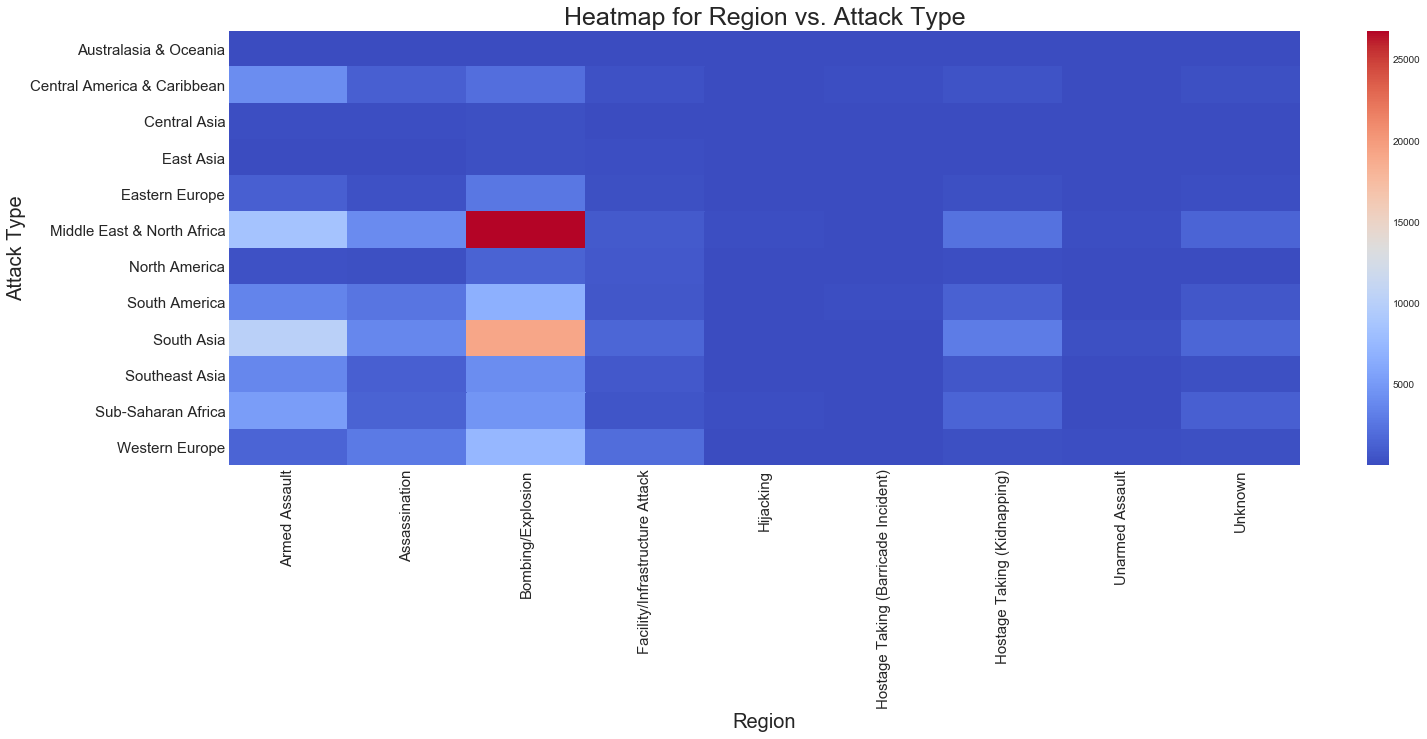

In [209]:
# Heatmap for Region vs. Attack Type:
plt.figure(figsize=(24, 8))
sns.heatmap(df_region_attack, cmap="coolwarm" )
plt.title('Heatmap for Region vs. Attack Type', fontsize=25)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Attack Type', fontsize=20)
plt.xlabel('Region', fontsize=20)

#### Yes, there certainly is! Bombing/explosion are prevalent in the Middle East & North Africa and South Asia regions.

----
#### Now, let's zoom in to incestigate terrorist attacks happened in the United States:

In [78]:
# subset the data frame to U.S. data only:
df_usa = df[df.country_txt == 'United States']

In [79]:
# check the head of data frame:
df_usa.head(2)

,year,month,day,country_id,country_txt,region_id,region_txt,provstate,city,latitude,...,attacktype_id,attacktype_txt,targtype_id,targtype_txt,gang_name,weaptype_id,weaptype_txt,n_killed,n_wound,date
date,,,,,,,,,,,,,,,,,,,,,
1970-01-01,1970,1,1,217,United States,1,North America,Illinois,Cairo,37.005105,...,2,Armed Assault,3,Police,Black Nationalists,5,Firearms,0.0,0.0,1970-01-01
1970-01-02,1970,1,2,217,United States,1,North America,California,Oakland,37.805065,...,3,Bombing/Explosion,21,Utilities,Unknown,6,Explosives/Bombs/Dynamite,0.0,0.0,1970-01-02


In [80]:
df_usa.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2588 entries, 1970-01-01 to 2016-12-15
Data columns (total 23 columns):
year              2588 non-null int64
month             2588 non-null int64
day               2588 non-null int64
country_id        2588 non-null int64
country_txt       2588 non-null object
region_id         2588 non-null int64
region_txt        2588 non-null object
provstate         2588 non-null object
city              2588 non-null object
latitude          2587 non-null float64
longitude         2587 non-null float64
success           2588 non-null category
suicide           2588 non-null category
attacktype_id     2588 non-null int64
attacktype_txt    2588 non-null object
targtype_id       2588 non-null int64
targtype_txt      2588 non-null object
gang_name         2588 non-null object
weaptype_id       2588 non-null int64
weaptype_txt      2588 non-null object
n_killed          2516 non-null float64
n_wound           2498 non-null float64
date             

In [81]:
df_usa.describe()

,year,month,day,country_id,region_id,latitude,longitude,attacktype_id,targtype_id,weaptype_id,n_killed,n_wound
count,2588.000000,2588.000000,2588.000000,2588.0,2588.0,2587.000000,2587.000000,2588.000000,2588.000000,2588.000000,2516.000000,2498.000000
mean,1983.419629,6.232998,15.383308,217.0,1.0,36.760864,-92.351758,4.241499,6.283617,6.617079,1.448728,7.239392
std,13.510898,3.383976,8.986821,0.0,0.0,7.293351,21.995961,2.123011,5.687447,1.618831,39.315982,209.378542
min,1970.000000,1.000000,1.000000,217.0,1.0,17.966072,-157.858333,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1971.000000,3.000000,7.000000,217.0,1.0,34.053490,-118.126287,3.000000,1.000000,6.000000,0.000000,0.000000
50%,1979.000000,6.000000,15.000000,217.0,1.0,38.890370,-85.766404,3.000000,4.000000,6.000000,0.000000,0.000000
75%,1994.000000,9.000000,23.000000,217.0,1.0,40.783060,-74.005941,7.000000,10.000000,8.000000,0.000000,0.000000
max,2016.000000,12.000000,31.000000,217.0,1.0,64.837778,105.270546,9.000000,22.000000,13.000000,1383.000000,7366.000000


In [82]:
df_usa.provstate.value_counts()

California              568
New York                443
Puerto Rico             220
Florida                 143
Illinois                102
Washington               96
District of Columbia     79
Oregon                   63
Massachusetts            56
Texas                    55
Ohio                     49
Colorado                 44
New Jersey               43
Michigan                 41
Virginia                 38
Wisconsin                37
Missouri                 36
Maryland                 33
Arizona                  31
Pennsylvania             31
Georgia                  29
North Carolina           28
Minnesota                24
Iowa                     23
Tennessee                21
Indiana                  21
Nebraska                 20
Utah                     20
New Mexico               19
Louisiana                18
Connecticut              17
Nevada                   16
Alabama                  15
Kansas                   13
Idaho                    13
Oklahoma            

In [89]:
# Group the U.S data by state:
state_count = df_usa.groupby('provstate').count()[['date']]
state_count = state_count.reset_index()
state_count.columns = ['state_name', 'num_of_attacks']
state_count.head()

,state_name,num_of_attacks
0,Alabama,15
1,Alaska,1
2,Arizona,31
3,Arkansas,5
4,California,568


In [98]:
# Have this state code vs state name dictionary from the internet:
state_dict = {"AL": "Alabama",
    "AK": "Alaska",
    "AS": "American Samoa",
    "AZ": "Arizona",
    "AR": "Arkansas",
    "CA": "California",
    "CO": "Colorado",
    "CT": "Connecticut",
    "DE": "Delaware",
    "DC": "District Of Columbia",
    "FM": "Federated States Of Micronesia",
    "FL": "Florida",
    "GA": "Georgia",
    "GU": "Guam",
    "HI": "Hawaii",
    "ID": "Idaho",
    "IL": "Illinois",
    "IN": "Indiana",
    "IA": "Iowa",
    "KS": "Kansas",
    "KY": "Kentucky",
    "LA": "Louisiana",
    "ME": "Maine",
    "MH": "Marshall Islands",
    "MD": "Maryland",
    "MA": "Massachusetts",
    "MI": "Michigan",
    "MN": "Minnesota",
    "MS": "Mississippi",
    "MO": "Missouri",
    "MT": "Montana",
    "NE": "Nebraska",
    "NV": "Nevada",
    "NH": "New Hampshire",
    "NJ": "New Jersey",
    "NM": "New Mexico",
    "NY": "New York",
    "NC": "North Carolina",
    "ND": "North Dakota",
    "MP": "Northern Mariana Islands",
    "OH": "Ohio",
    "OK": "Oklahoma",
    "OR": "Oregon",
    "PW": "Palau",
    "PA": "Pennsylvania",
    "PR": "Puerto Rico",
    "RI": "Rhode Island",
    "SC": "South Carolina",
    "SD": "South Dakota",
    "TN": "Tennessee",
    "TX": "Texas",
    "UT": "Utah",
    "VT": "Vermont",
    "VI": "Virgin Islands",
    "VA": "Virginia",
    "WA": "Washington",
    "WV": "West Virginia",
    "WI": "Wisconsin",
    "WY": "Wyoming"}


In [101]:
# reverse the dictionary:
state_dict_reverse = {}
for k, v in state_dict.items():
    state_dict_reverse[v] = k

state_dict_reverse

{'Alabama': 'AL',
 'Alaska': 'AK',
 'American Samoa': 'AS',
 'Arizona': 'AZ',
 'Arkansas': 'AR',
 'California': 'CA',
 'Colorado': 'CO',
 'Connecticut': 'CT',
 'Delaware': 'DE',
 'District Of Columbia': 'DC',
 'Federated States Of Micronesia': 'FM',
 'Florida': 'FL',
 'Georgia': 'GA',
 'Guam': 'GU',
 'Hawaii': 'HI',
 'Idaho': 'ID',
 'Illinois': 'IL',
 'Indiana': 'IN',
 'Iowa': 'IA',
 'Kansas': 'KS',
 'Kentucky': 'KY',
 'Louisiana': 'LA',
 'Maine': 'ME',
 'Marshall Islands': 'MH',
 'Maryland': 'MD',
 'Massachusetts': 'MA',
 'Michigan': 'MI',
 'Minnesota': 'MN',
 'Mississippi': 'MS',
 'Missouri': 'MO',
 'Montana': 'MT',
 'Nebraska': 'NE',
 'Nevada': 'NV',
 'New Hampshire': 'NH',
 'New Jersey': 'NJ',
 'New Mexico': 'NM',
 'New York': 'NY',
 'North Carolina': 'NC',
 'North Dakota': 'ND',
 'Northern Mariana Islands': 'MP',
 'Ohio': 'OH',
 'Oklahoma': 'OK',
 'Oregon': 'OR',
 'Palau': 'PW',
 'Pennsylvania': 'PA',
 'Puerto Rico': 'PR',
 'Rhode Island': 'RI',
 'South Carolina': 'SC',
 'South Da

In [103]:
# add the state code as a new column to the data frame:
state_count['state_code'] = state_count['state_name'].map(state_dict_reverse)

In [123]:
# There are only a couple of rows that have missing value, drop them:
state_count.dropna(inplace=True)
state_count

,state_name,num_of_attacks,state_code
0,Alabama,15,AL
1,Alaska,1,AK
2,Arizona,31,AZ
3,Arkansas,5,AR
4,California,568,CA
5,Colorado,44,CO
6,Connecticut,17,CT
7,Delaware,3,DE
9,Florida,143,FL
10,Georgia,29,GA


In [119]:
data = dict(type='choropleth',
            colorscale = 'YIOrRd',
            locations = state_count['state_code'],
            z = state_count['num_of_attacks'],
            locationmode = 'USA-states',
            text = state_count['state_name'],
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 2)),
            colorbar = {'title':"Number of Attacks"}
            ) 

In [120]:
layout = dict(title = 'Number of Terrorist Attacks in the U.S. from 1970 to 2016',
              geo = dict(scope='usa',
                         showlakes = True,
                         lakecolor = 'rgb(85,173,240)')
             )

In [121]:
choromap = go.Figure(data = [data],layout = layout)

In [122]:
iplot(choromap)

#### From this graph, we can see that California and New York have the most terrorist attacks from 1970 to 2016.

----
#### What about a time trend from year 1970 to year 2016?

In [171]:
# Make a frequency table of year and state:
df_state = pd.crosstab(index=df_usa.year, columns=df_usa.provstate)  
df_state

provstate,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,Unknown,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
year,,,,,,,,,,,,,,,,,,,,,
1970,2,0,2,0,96,13,7,0,9,13,...,2,8,0,1,0,0,19,1,21,0
1971,0,0,1,0,115,2,0,0,2,6,...,0,4,0,0,1,0,0,0,0,0
1972,0,0,0,0,15,0,0,0,1,3,...,0,1,0,0,0,1,1,0,0,0
1973,1,0,0,0,14,1,0,0,4,1,...,0,0,0,0,0,0,0,0,1,0
1974,0,0,0,0,27,3,1,0,5,6,...,0,0,0,0,0,0,0,0,0,0
1975,0,0,1,0,50,5,1,0,5,18,...,1,0,0,1,0,0,8,0,0,0
1976,0,0,1,0,24,0,0,0,5,6,...,0,0,1,0,0,0,1,0,0,0
1977,0,0,0,0,33,0,0,0,6,6,...,1,0,0,0,1,0,12,0,0,0
1978,1,1,0,0,6,1,0,1,1,1,...,1,0,0,0,1,1,0,0,0,0


Text(0,0.5,'Count')

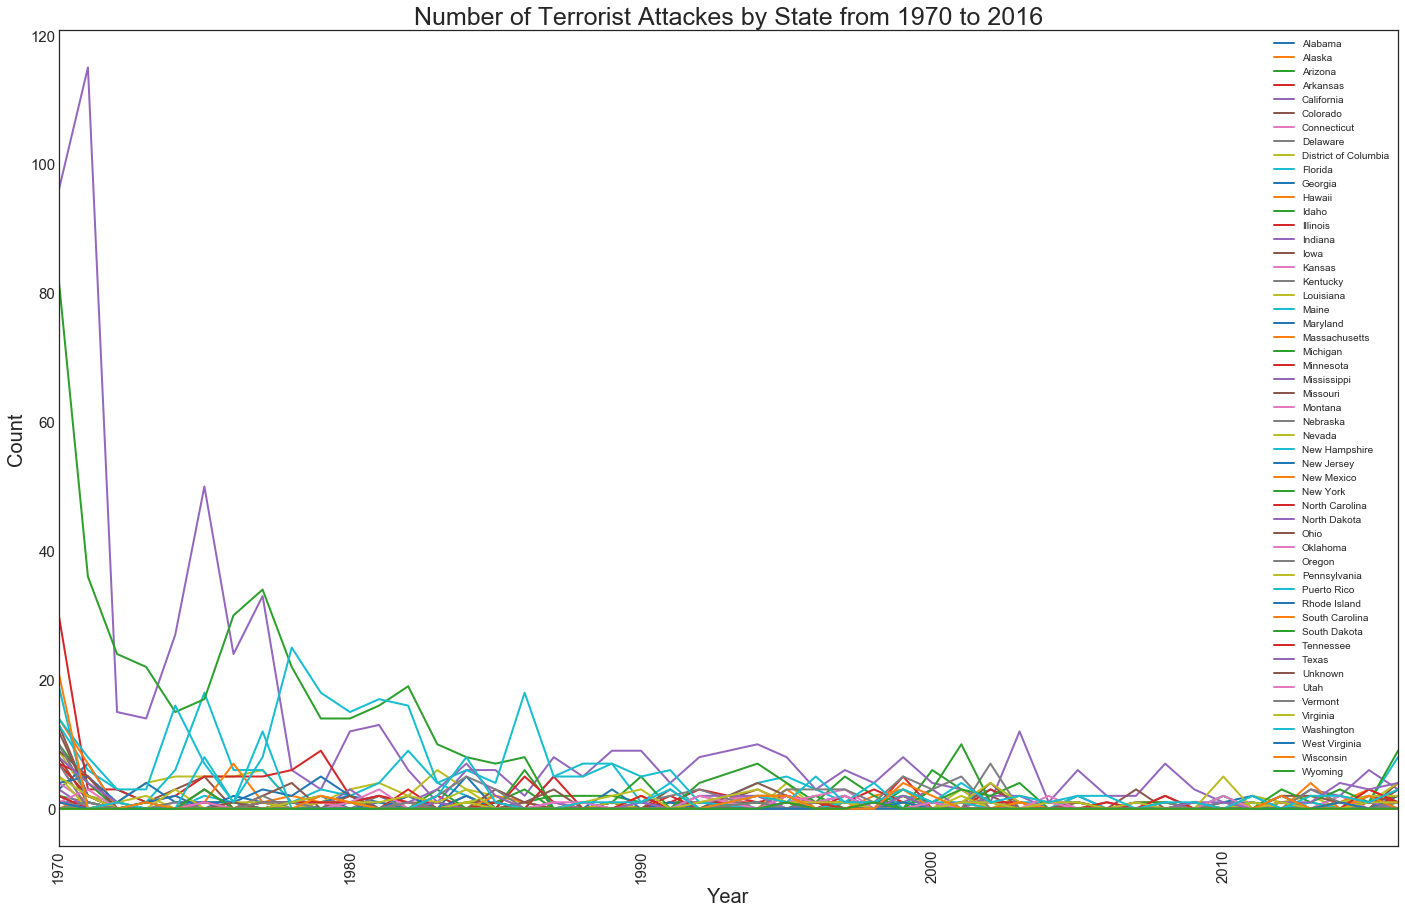

In [219]:
# Number of Terrorist Attackes by State from 1970 to 2016:
df_state.plot(figsize=(24, 15), lw=2)
plt.legend(fontsize=10)
plt.title('Number of Terrorist Attackes by State from 1970 to 2016', fontsize=25)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Count', fontsize=20)

#### It seems that the number of attacks in the U.S. are going down since the 1970s and 1980s.  

----
#### The graph above is a bit hard to see, so I want to decrease the amount of information presented in a graph to the top 10 states & territories that have the most number of attacks:

In [194]:
# Reshape the data to sum number of attacks from 170  to 2016:
US_top10 = df_state.sum()
US_top10 = pd.DataFrame(US_top10)
US_top10.index.name = 'state'
US_top10.columns = ['attack_counts']
US_top10

,attack_counts
state,
Alabama,15
Alaska,1
Arizona,31
Arkansas,5
California,568
Colorado,44
Connecticut,17
Delaware,3
District of Columbia,79


In [195]:
# Reshape the data to find top 10 States and Territories with the Highest Number of Attacks from 1970 to 2016:
US_top10 = US_top10.sort_values(by=['attack_counts'], ascending=False).head(10)
US_top10

,attack_counts
state,
California,568
New York,443
Puerto Rico,220
Florida,143
Illinois,102
Washington,96
District of Columbia,79
Oregon,63
Massachusetts,56


In [187]:
US_top10.index

Index(['California', 'New York', 'Puerto Rico', 'Florida', 'Illinois',
       'Washington', 'District of Columbia', 'Oregon', 'Massachusetts',
       'Texas'],
      dtype='object', name='state')

In [196]:
# Subset the data frame df_state with the top 10 states and terroteries:
US_top10 = df_state[['California', 'New York', 'Puerto Rico', 'Florida', 'Illinois',
       'Washington', 'District of Columbia', 'Oregon', 'Massachusetts',
       'Texas']]
US_top10

state,California,New York,Puerto Rico,Florida,Illinois,Washington,District of Columbia,Oregon,Massachusetts,Texas
year,,,,,,,,,,
1970,96,82,14,13,30,19,9,10,14,8
1971,115,36,8,6,3,0,2,2,7,4
1972,15,24,3,3,3,1,1,0,0,1
1973,14,22,3,1,1,0,4,0,0,0
1974,27,15,16,6,2,0,5,1,0,0
1975,50,17,7,18,5,8,5,0,1,0
1976,24,30,1,6,5,1,5,0,7,0
1977,33,34,8,6,5,12,6,2,1,0
1978,6,22,25,1,6,0,1,0,2,0


Text(0,0.5,'Count')

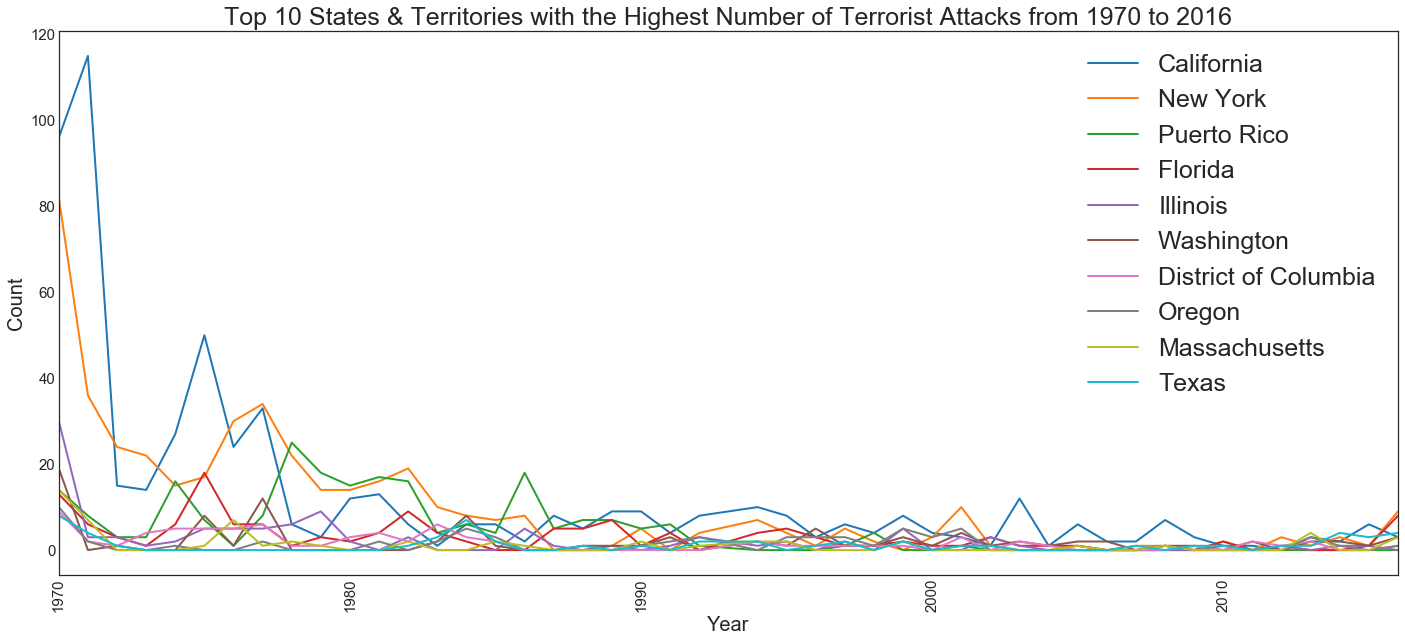

In [198]:
# Top 10 States and Territories with the Highest Number of Terrorist Attacks from 1970 to 2016:
# Legend in descending order:
US_top10.plot(figsize=(24, 10), lw=2)
plt.legend(fontsize=25)
plt.title('Top 10 States & Territories with the Highest Number of Terrorist Attacks from 1970 to 2016', fontsize=25)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Count', fontsize=20)

#### This graph shows the top 10 states and territories that have the most number of attacks. The order of the legend is also the in the descending order of the highest number of attacks.